<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220502_TextAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텍스트 분석
: 비정형 텍스트에서 의미 있는 정볼르 추출하는 데 중점

- 텍스트 분류text classification: 문서가 특정 분류 혹은 카테고리에 속하는 것을 예측
- 감성 분석sentiment Analysis: 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적 요소를 분석하는 기법
- 텍스트 요약Summarization: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
- 텍스트 군집화와 유사도 측정: 비슷한 유형의 문서에 대해 군집활르 수행하는 기법

##1 텍스트 분석 이해
: 비정형 텍스트를 분석하는 것. 
- ML 모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행. ML 알고리즘은 숫자형의 피처 기반 데이터만 입력 가능 
-> 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가?
- BOW(Bag of Words)와 Word2Vec

##텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업(텍스트 전처리)
2. 피처 벡터화/추출
3. ML 모델 수립 및 학습/예측/평가

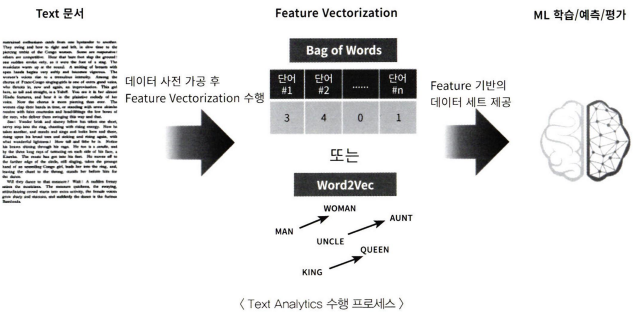

##파이썬 기반의 NLP, 텍스트 분석 패키지
- NLtK(Natural Language Toolkit for Python): 가장 대표적인 NLP 패키지. 방대한 데이터 셋과 서브 모듈을 가지고 있으며 MLP의 거의 모든 영역을 커버함. 수행 속도가 느린 편이라 실제 대량의 데이터에서는 제대로 활용하지 못함
- Gensim: 토픽 모델링 분야에서 가장 두각을 드러내는 패키지. 오래 전부터 토픽 모델링을 쉽게 구현할 수 있는 기능 제공. Word2Vec 구현 가능.
- SpaCy: 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

#2. 텍스트 전처리 - 텍스트 정규화

- 클렌징Cleansing: 텍스트 분석에서 방해가 되는 불필요한 문자, 기호 등을 제거. e.g. HTML, XML 태그
- 토큰화Tokenization
    - 문장 토큰화: 문서에서 문장을 분리: 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적.
    - 단어 토큰화: 문장에서 단어를 토큰으로 분리. 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 활용.
- 필터링/스톱 워드 제거/철자 수정
    - 스톱 워드(Stop word): 분석에 큰 의미가 없는 단어. e.g. is, the, a, will etc.
    - 제거하지 않으면 빈도가 높아 중요한 단어로 인지될 수 있음
- Stemming: 문법적/의미적으로 변화하는 단어의 원형을 찾는 것. 원형 단어로 변환 시 일반적인 방법을 사용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
- Lemmaization: stemming과 같은 목적을 가지나 더 정교하고 의미론적 기반에서 단어의 원형을 찾음. 품사와 같은 문법적 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾음

In [4]:
#문장 토큰화
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room.\
You can see it out. your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.You can see it out.', 'your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [5]:
#단어 토큰화
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [6]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    #문장별로 분리 토큰
    sentences = sent_tokenize(text)
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room.You', 'can', 'see', 'it', 'out', '.'], ['your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [11]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        #소문자로 모두 변환
        word = word.lower()
        #토큰화된 개별 단어가 스톱워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room.you', 'see', '.'], ['window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [12]:
#Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
amuse amuse amuse
happy happy
fancy fancy


#3. Bag of Words - BOW
: 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델. 쉽고 빠른 구축이 가능하고 문서의 특징을 잘 나타낼 수 있는 모델로 활용도가 높음.

- 단점
    - 문맥 의미 반영 부족: 단어의 순서를 고려하지 않아 문장 내에서 단어의 문맥적인 의미가 무시됨. 보완하기 위해 n_gram 기법을 사용할 수 있지만 한계가 있음
    - 희소 행렬 문제(희소성, 희소 행렬): 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어짐. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 많음. 
        - 희소 행렬: 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬. 일반적으로 ML 알고리즘의 수행시간과 성능을 떨어트림
        - 밀집 행렬: 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬

##BOW 피처 벡터화
- 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 이 피처에 값으로 부여해 각 문서를 이 단어의 피처 발생 빈도 값으로 구성된 벡터로 만드는 기법.
    - 카운트 기반의 벡터화
        - 각 문서에서 해당 단어가 나타나는 횟수를 부여하는 경우
        - 카운트 값이 높을수록 중요한 단어로 인식.
            - 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값 부여.
    - TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화
        - 개별 문서에서 자주 나타나는 단어에 높은 가중치 부여.
        - 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티 부여.
        - 넓은 범위의 피처 추출에 포함. (Text Analysis에서는 피처 벡터화 = 피처 추출)

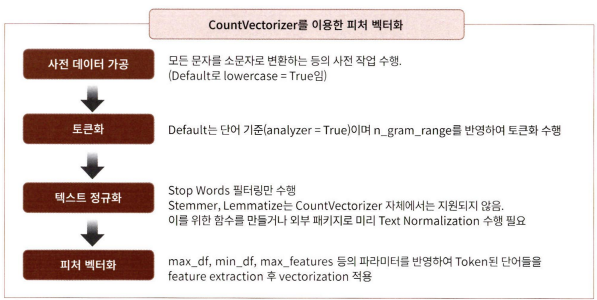

##BOW 벡터화를 위한 희소 행렬
희소 행렬 - COO 형식

: 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도를 배열로 저장하는 방식.

In [14]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3, 1, 2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

희소 행렬 - CSR 형식
: 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [15]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# C00 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('C00 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

C00 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [16]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

#5. 감성 분석
- 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법.
- 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성(Sentiment) 수치를 계산하는 방법 이용.
    - 감성 지수
    - 긍정 감성 지수
    - 부정 감성 지수
- 지도 학습 방식: 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법. 일반적인 텍스트 기반의 분류와 거의 동일.
- 비지도 학습 방식: 'Lexicon'이라는 일종의 감성 어휘 사전 이용.
Lexicon: 감성 분석을 위한 용어와 문맥에 대한 다양한 정보 보유. 문서의 긍정적, 부정적 감성 여부 판단에 쓰임.

지도학습 기반 감성 분석 실습 - IMDB 영화평

In [18]:
import pandas as pd

review_df = pd.read_csv('/content/labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


- id: 각 데이터의 id
- sentiment: 영화평(review)의 sentiment 결과 값(Target Label).
    - 긍정적 평가: 1
    - 부정적 평가: 0
- review: 영화평의 텍스트

In [19]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [20]:
import re # 정규 표현식 지원

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br \>',' ')

# 파이썬의 정규 표현식 모듈인 re를 이요해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [21]:
from sklearn.model_selection import train_test_split

# 결정값 데이터 세트
class_df = review_df['sentiment']
# 피처 데이터 세트
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((8672, 1), (3717, 1))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.8684, ROC-AUC는 0.9357


In [23]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
                     ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8773, ROC-AUC는 0.9479


**SentiWordNet**을 이용한 감성 분석

In [24]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [25]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의synsets 생성.
synsets = wn.synsets(term)
print('synsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


반환 값 해석

- present : 의미
- n : 명사 품사
- 01 : present가 명사로서 가지는 의미 중 구분

In [26]:
for synset in synsets:
    print('##### Synset name: ',synset.name(), '#####')
    print('POS:',synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names())

##### Synset name:  present.n.01 #####
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name:  present.n.02 #####
POS: noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name:  present.n.03 #####
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name:  show.v.01 #####
POS: verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name:  present.v.02 #####
POS: verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name:  stage.v.01 #####
POS: verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
##### Sy

In [27]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity),2)
                   for compared_entity in entities]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [28]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


SentiSynset 객체

- 단어의 감성을 나타내는 감성 지수
    - 긍정 감성 지수
    - 부정 감성 지수
- 객관성(↔감성)을 나타내는 객관성 지수

In [29]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


SentiWordNet을 이용한 영화 감상평 감성 분석

1. 문서를 문장 단위로 분해
2. 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체 생성
4. senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

In [30]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
        
    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그럻지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1
    
    return 0

In [32]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도:', np.round(accuracy_score(y_target, preds), 4))
print('정밀도:', np.round(precision_score(y_target, preds), 4))
print('재현율:', np.round(recall_score(y_target, preds), 4))

[[3748 2388]
 [1828 4425]]
정확도: 0.6597
정밀도: 0.6495
재현율: 0.7077


VADER를 이용한 감성 분석

- VADER: 소셜 미디어의 감성 분석 용도로 반들어진 룰 기반의 Lexicon. SentimentIntensityAnalyzer 클래스를 이용해 제공.
    - neg: 부정 감성 지수
    - neu: 중립 감성 지수
    - pos: 긍정 감성 지수
    - compound: neg, neu, pos score를 적절히 조합해 -1~1 사이의 감정 지수를 표현한 값. 이 값을 기준으로 부정 감성(보통 0.1 이하) 또는 긍정 감성(보통 0.1 이상) 여부 결정.

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.127, 'neu': 0.747, 'pos': 0.125, 'compound': -0.7943}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [35]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x,0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도:', np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도:', np.round(precision_score(y_target, vader_preds), 4))
print('재현율:', np.round(recall_score(y_target, vader_preds), 4))

[[3308 2828]
 [ 889 5364]]
정확도: 0.7
정밀도: 0.6548
재현율: 0.8578
